In [5]:
%matplotlib inline
import webbpsf
import astropy.units as u
import os
import matplotlib.pyplot as plt
os.system("export WEBBPSF_PATH=/home/nmonnier/Data/JWST/webbpsf/webbpsf-data")

0

In [2]:
miri = webbpsf.MIRI()
miri.mode = 'IFU'
miri.band= '1C'
print("Band is", miri.band)


Band is 1C


In [3]:
# let's get a subset for a faster PSF sim runtime
waves = miri.get_IFU_wavelengths(nlambda=50)

# convert waves from  microns to meters
# (this is a work around for a current issue with the poppy library upstream)
waves = waves.to_value(u.meter)


In [4]:
cube = miri.calc_datacube(waves)
psf = miri.calc_psf(fov_pixels=251,fov_arcsec=251*0.025)


/home/nmonnier/anaconda3/envs/webbpsf/lib/python3.10/site-packages/webbpsf/opds.py:1759: UserWarning: For (V2,V3) = [-8.38815333 -5.31410167] arcmin, Field point -8.254199999999999 arcmin, -2.485898333333334 arcmin not within valid region for field dependence model of OTE WFE for MIRI: -8.254199999999999 arcmin--6.21738 arcmin, -2.557224 arcmin--0.5632056 arcmin.  Clipping to closest available valid location, 0.13395333333333426 arcmin away from the requested coordinates.
  warnings.warn(warning_message)
/home/nmonnier/anaconda3/envs/webbpsf/lib/python3.10/site-packages/webbpsf/opds.py:1759: UserWarning: For (V2,V3) = [-8.38815333 -5.31410167] arcmin, Field point -8.254199999999999 arcmin, -2.485898333333334 arcmin not within valid region for field dependence model of OTE WFE for MIRI: -8.254199999999999 arcmin--6.21738 arcmin, -2.557224 arcmin--0.5632056 arcmin.  Clipping to closest available valid location, 0.13395333333333426 arcmin away from the requested coordinates.
  warnings.wa

NameError: name 'plt' is not defined

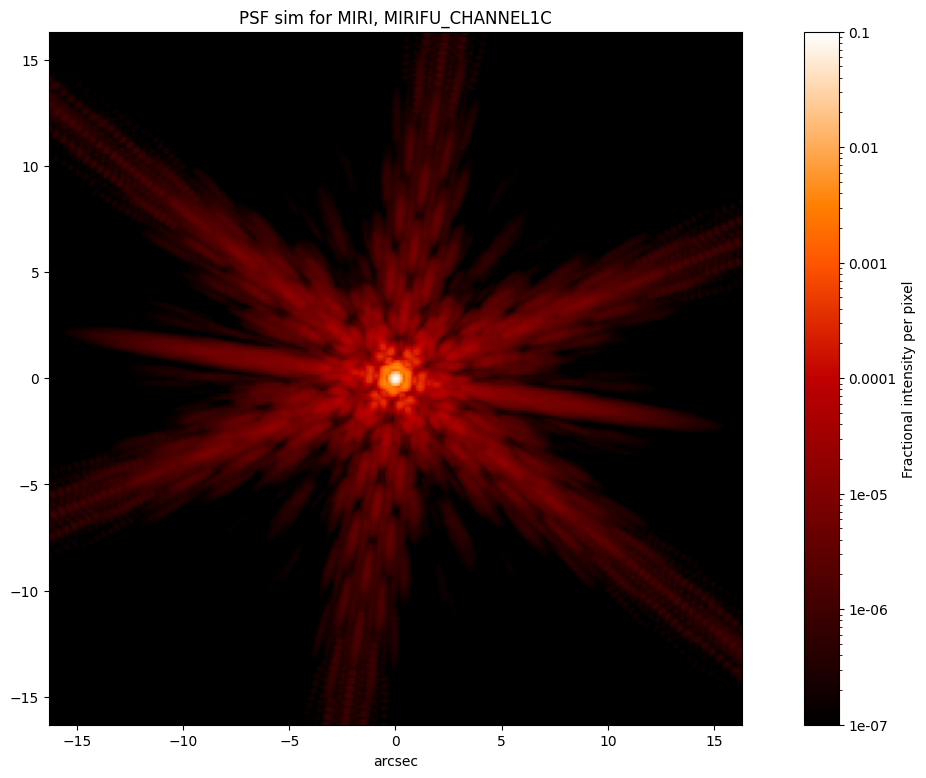

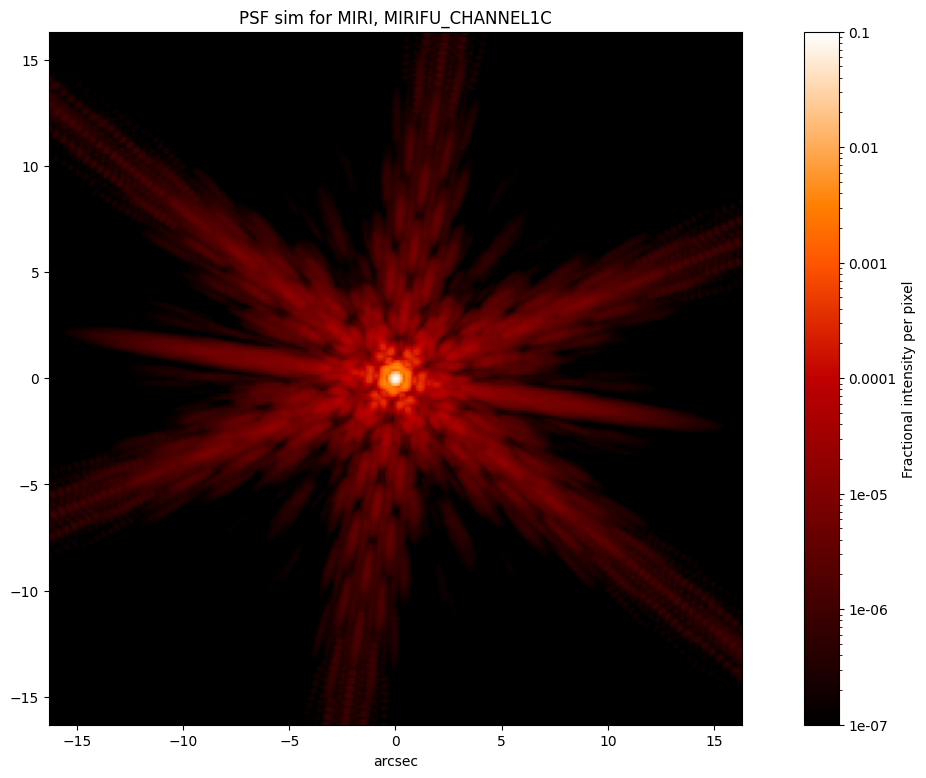

In [7]:
plt.figure(figsize=(16,9))
webbpsf.display_psf(psf, ext=1)
plt.show()

In [ ]:
index = 20
webbpsf.display_psf(cube, ext=3, cube_slice=index,
                    # Note that currently the default plot title isn't very informative for datacube modes
                    # so we can specify a better title directly here:
                    title=f'MIRI MRS band {miri.band}, cube slice {index}, $\\lambda$={cube[0].header["WAVELN"+str(index)]*1e6:.4} micron')
